# yolo , resnet train loss curve and Optimal parameter comparison chart

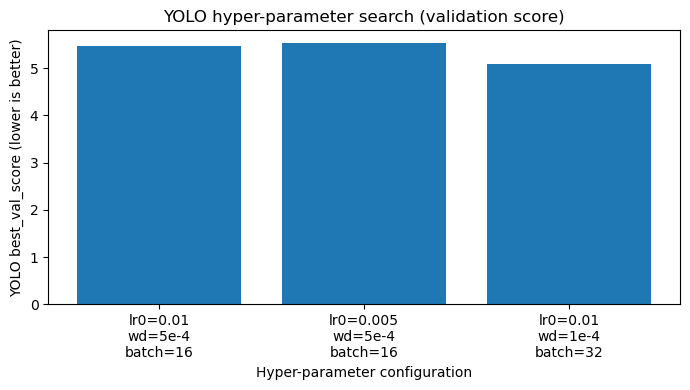

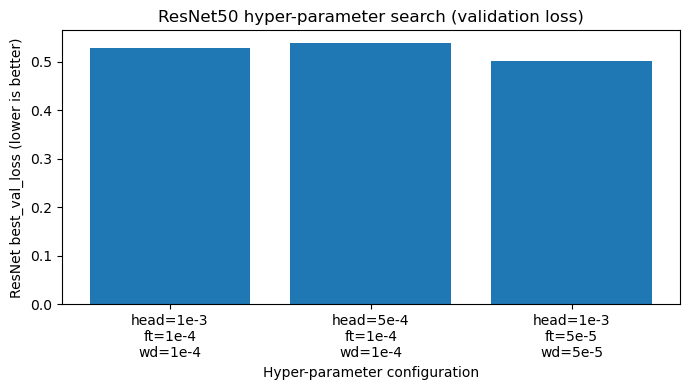

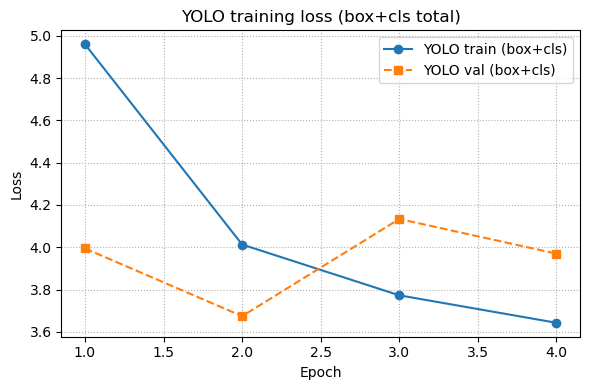

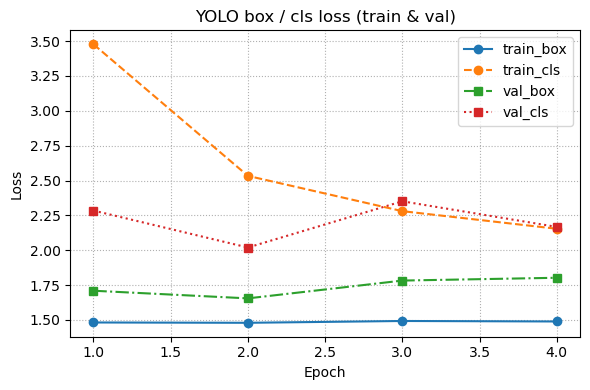

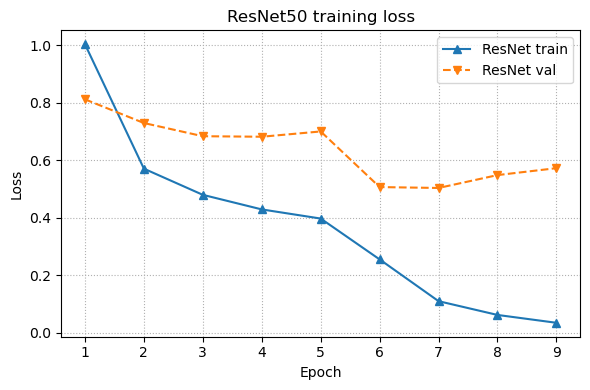

In [2]:
import matplotlib.pyplot as plt

# ================== 一、YOLO：超参搜索结果（x 轴显示具体参数） ==================
# 三组配置：
# cfg01: lr0=0.01, weight_decay=5.0e-04, batch=16
# cfg02: lr0=0.005, weight_decay=5.0e-04, batch=16
# cfg03: lr0=0.01, weight_decay=1.0e-04, batch=32

yolo_cfg_labels = [
    "lr0=0.01\nwd=5e-4\nbatch=16",
    "lr0=0.005\nwd=5e-4\nbatch=16",
    "lr0=0.01\nwd=1e-4\nbatch=32",
]

yolo_best_val_score = [5.4748, 5.5248, 5.0784]

plt.figure(figsize=(7, 4))
x = range(len(yolo_cfg_labels))
plt.bar(x, yolo_best_val_score)
plt.xticks(list(x), yolo_cfg_labels)  # 👈 这里用具体参数
plt.ylabel("YOLO best_val_score (lower is better)")
plt.xlabel("Hyper-parameter configuration")
plt.title("YOLO hyper-parameter search (validation score)")
plt.tight_layout()
plt.show()


# ================== 二、ResNet：超参搜索结果（x 轴显示具体参数） ==================
# 三组配置：
# cfg01: head_lr=1.0e-03, ft_lr=1.0e-04, weight_decay=1.0e-04
# cfg02: head_lr=5.0e-04, ft_lr=1.0e-04, weight_decay=1.0e-04
# cfg03: head_lr=1.0e-03, ft_lr=5.0e-05, weight_decay=5.0e-05

resnet_cfg_labels = [
    "head=1e-3\nft=1e-4\nwd=1e-4",
    "head=5e-4\nft=1e-4\nwd=1e-4",
    "head=1e-3\nft=5e-5\nwd=5e-5",
]

resnet_best_val_loss = [0.5283, 0.5381, 0.5016]

plt.figure(figsize=(7, 4))
x = range(len(resnet_cfg_labels))
plt.bar(x, resnet_best_val_loss)
plt.xticks(list(x), resnet_cfg_labels)  # 👈 这里用具体参数
plt.ylabel("ResNet best_val_loss (lower is better)")
plt.xlabel("Hyper-parameter configuration")
plt.title("ResNet50 hyper-parameter search (validation loss)")
plt.tight_layout()
plt.show()


# ================== 三、YOLO：训练过程 loss 曲线（保持不变） ==================
yolo_epochs = [1, 2, 3, 4]
yolo_train_box = [1.4819, 1.4796, 1.4926, 1.4891]
yolo_train_cls = [3.4776, 2.5334, 2.2804, 2.1540]
yolo_val_box   = [1.7096, 1.6548, 1.7825, 1.8026]
yolo_val_cls   = [2.2847, 2.0196, 2.3512, 2.1673]

yolo_train_total = [b + c for b, c in zip(yolo_train_box, yolo_train_cls)]
yolo_val_total   = [b + c for b, c in zip(yolo_val_box,   yolo_val_cls)]

plt.figure(figsize=(6, 4))
plt.plot(yolo_epochs, yolo_train_total, marker="o", linestyle="-", label="YOLO train (box+cls)")
plt.plot(yolo_epochs, yolo_val_total,   marker="s", linestyle="--", label="YOLO val (box+cls)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("YOLO training loss (box+cls total)")
plt.grid(True, linestyle=":")
plt.legend()
plt.tight_layout()
plt.show()

# 可选：YOLO box / cls 单独曲线
plt.figure(figsize=(6, 4))
plt.plot(yolo_epochs, yolo_train_box, marker="o", linestyle="-",  label="train_box")
plt.plot(yolo_epochs, yolo_train_cls, marker="o", linestyle="--", label="train_cls")
plt.plot(yolo_epochs, yolo_val_box,   marker="s", linestyle="-.", label="val_box")
plt.plot(yolo_epochs, yolo_val_cls,   marker="s", linestyle=":",  label="val_cls")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("YOLO box / cls loss (train & val)")
plt.grid(True, linestyle=":")
plt.legend()
plt.tight_layout()
plt.show()


# ================== 四、ResNet：训练过程 loss 曲线（保持不变） ==================
resnet_epochs = list(range(1, 10))
resnet_train_loss = [1.0038, 0.5710, 0.4800, 0.4293, 0.3975,
                     0.2554, 0.1101, 0.0622, 0.0349]
resnet_val_loss   = [0.8122, 0.7298, 0.6839, 0.6821, 0.7005,
                     0.5070, 0.5039, 0.5487, 0.5728]

plt.figure(figsize=(6, 4))
plt.plot(resnet_epochs, resnet_train_loss, marker="^", linestyle="-",  label="ResNet train")
plt.plot(resnet_epochs, resnet_val_loss,   marker="v", linestyle="--", label="ResNet val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("ResNet50 training loss")
plt.grid(True, linestyle=":")
plt.legend()
plt.tight_layout()
plt.show()


# Comparison chart of traditional machine learning results

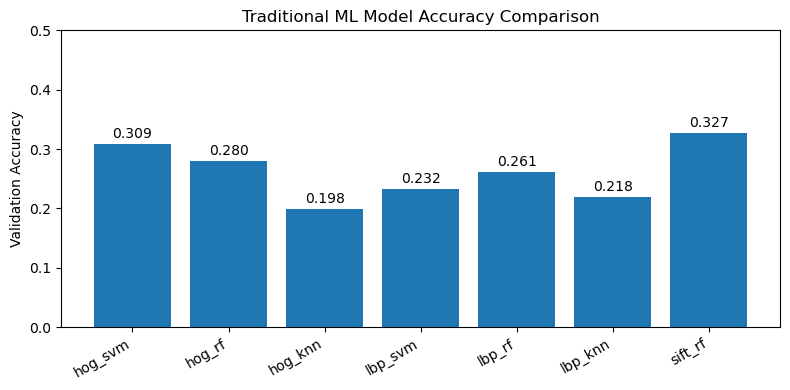

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# ---------- 1. 数据 ----------
data = {
    "Method": ["hog_svm", "hog_rf", "hog_knn",
               "lbp_svm", "lbp_rf", "lbp_knn",
               "sift_rf"],
    "Val_Acc": [0.3087, 0.2796, 0.1984,
                0.2319, 0.2610, 0.2185,
                0.3274],
}

df = pd.DataFrame(data)

# ---------- 2. 画图 ----------
plt.figure(figsize=(8, 4))
x = range(len(df))

# 柱状图
plt.bar(x, df["Val_Acc"])

# x 轴标签
plt.xticks(x, df["Method"], rotation=30, ha="right")

# y 轴范围
plt.ylim(0, 0.5)
plt.ylabel("Validation Accuracy")
plt.title("Traditional ML Model Accuracy Comparison")

# 在每个柱子上写数值
for i, acc in enumerate(df["Val_Acc"]):
    plt.text(i, acc + 0.01, f"{acc:.3f}", ha="center")

plt.tight_layout()
plt.show()


# Comparison chart of deep learning machine results

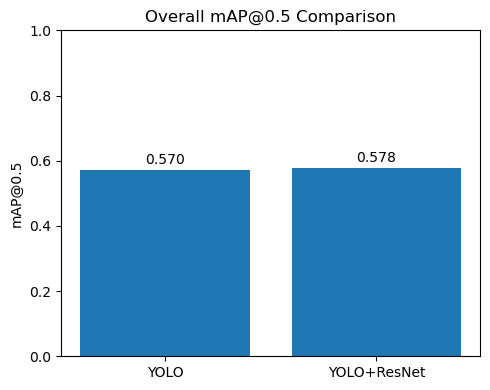

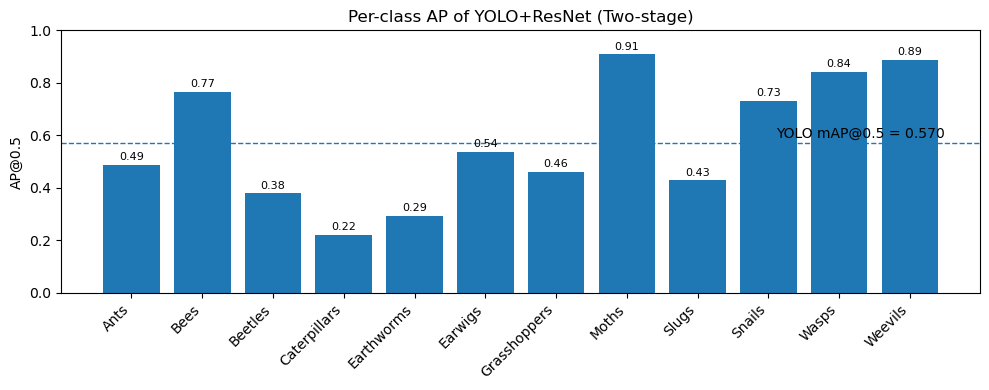

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# ======================================
# 0. 准备数据（直接用你给的结果）
# ======================================

# 类别名称（和 data.yaml / checkpoint 里一致）
class_names = [
    "Ants", "Bees", "Beetles", "Caterpillars",
    "Earthworms", "Earwigs", "Grasshoppers", "Moths",
    "Slugs", "Snails", "Wasps", "Weevils"
]

# YOLO+ResNet (two-stage) 的 per-class AP
two_stage_ap = [
    0.4864,  # Ants
    0.7658,  # Bees
    0.3787,  # Beetles
    0.2217,  # Caterpillars
    0.2937,  # Earthworms
    0.5367,  # Earwigs
    0.4606,  # Grasshoppers
    0.9085,  # Moths
    0.4286,  # Slugs
    0.7304,  # Snails
    0.8411,  # Wasps
    0.8870   # Weevils
]

# 纯 YOLO 在 test 上的整体指标（你之前跑出来的）
yolo_map50 = 0.5704   # [YOLO][TEST] mAP50=0.5704
two_stage_map50 = 0.5783  # Two-stage mAP@0.5 = 0.5783

# ======================================
# 1. 整体 mAP@0.5 对比图
# ======================================
plt.figure(figsize=(5, 4))

model_names = ["YOLO", "YOLO+ResNet"]
map_scores = [yolo_map50, two_stage_map50]

x = np.arange(len(model_names))

bars = plt.bar(x, map_scores)

plt.xticks(x, model_names)
plt.ylabel("mAP@0.5")
plt.ylim(0, 1.0)
plt.title("Overall mAP@0.5 Comparison")

# 在柱子上方标数值
for bar, score in zip(bars, map_scores):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f"{score:.3f}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()


# ======================================
# 2. YOLO+ResNet 各类别 AP + 纯 YOLO 总体 mAP 参考线
# ======================================
plt.figure(figsize=(10, 4))

x = np.arange(len(class_names))
bars = plt.bar(x, two_stage_ap)

plt.xticks(x, class_names, rotation=45, ha="right")
plt.ylabel("AP@0.5")
plt.ylim(0, 1.0)
plt.title("Per-class AP of YOLO+ResNet (Two-stage)")

# 画一条横线表示纯 YOLO 的整体 mAP@0.5
plt.axhline(y=yolo_map50, linestyle="--", linewidth=1)
plt.text(
    len(class_names) - 0.5,
    yolo_map50 + 0.01,
    f"YOLO mAP@0.5 = {yolo_map50:.3f}",
    ha="right",
    va="bottom"
)

# 在每个柱子上标 AP 数字（可选）
for bar, ap in zip(bars, two_stage_ap):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f"{ap:.2f}",
        ha="center",
        va="bottom",
        fontsize=8
    )

plt.tight_layout()
plt.show()


# Comparison chart of yolo+resnet with sift_rf

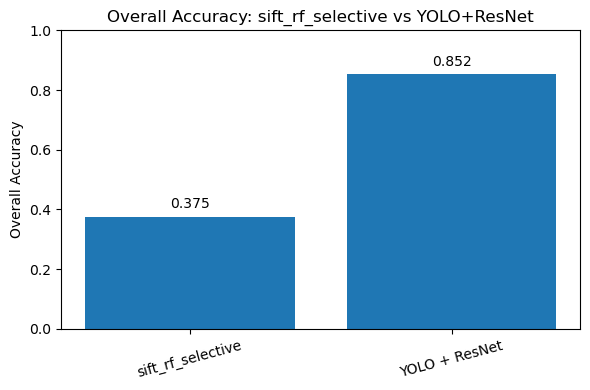

In [4]:
import matplotlib.pyplot as plt

# -------- 1. 总体准确率（你给的数字） --------
sift_rf_acc = 0.3746      # sift_rf_selective overall accuracy
yolo_resnet_acc = 0.8520  # YOLO+ResNet overall test accuracy

methods = ["sift_rf_selective", "YOLO + ResNet"]
scores = [sift_rf_acc, yolo_resnet_acc]

plt.figure(figsize=(6, 4))
x = range(len(methods))

plt.bar(x, scores)
plt.xticks(x, methods, rotation=15)
plt.ylim(0.0, 1.0)
plt.ylabel("Overall Accuracy")
plt.title("Overall Accuracy: sift_rf_selective vs YOLO+ResNet")

for xi, s in zip(x, scores):
    plt.text(xi, s + 0.02, f"{s:.3f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()


# Generate confusion matrices for YOLO and YOLO+ResNet.

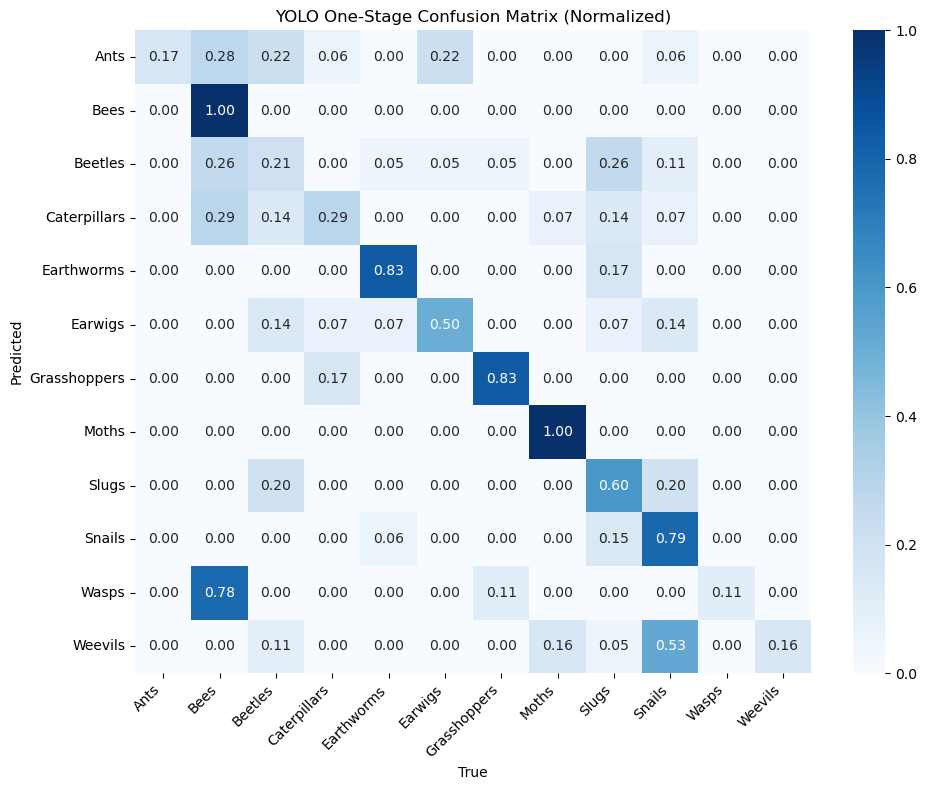

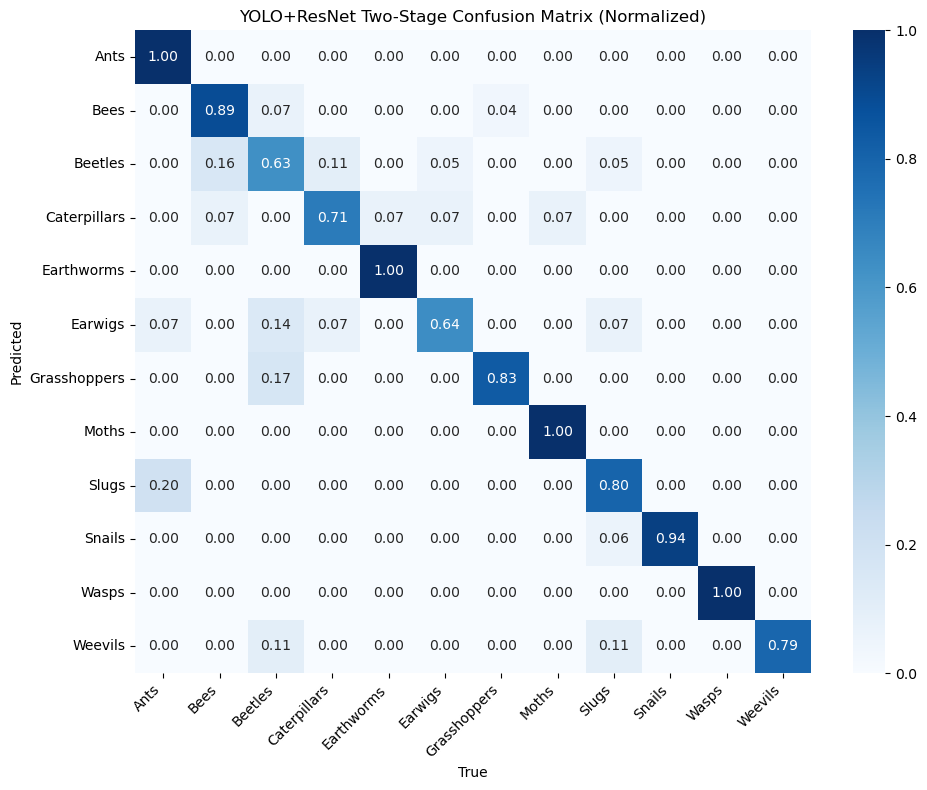

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===== 1. 类别名字（按你 data.yaml 的顺序）=====
class_names = [
    "Ants", "Bees", "Beetles", "Caterpillars",
    "Earthworms", "Earwigs", "Grasshoppers", "Moths",
    "Slugs", "Snails", "Wasps", "Weevils"
]

# ===== 2. 把你贴出来的混淆矩阵数字写进来 =====
# YOLO 一阶段（只用匹配到的 178 个框）
cm_yolo = np.array([
    [ 3,  5,  4,  1,  0,  4,  0,  0,  0,  1,  0,  0],
    [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  5,  4,  0,  1,  1,  1,  0,  5,  2,  0,  0],
    [ 0,  4,  2,  4,  0,  0,  0,  1,  2,  1,  0,  0],
    [ 0,  0,  0,  0,  5,  0,  0,  0,  1,  0,  0,  0],
    [ 0,  0,  2,  1,  1,  7,  0,  0,  1,  2,  0,  0],
    [ 0,  0,  0,  1,  0,  0,  5,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0],
    [ 0,  0,  1,  0,  0,  0,  0,  0,  3,  1,  0,  0],
    [ 0,  0,  0,  0,  2,  0,  0,  0,  5, 26,  0,  0],
    [ 0,  7,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0],
    [ 0,  0,  2,  0,  0,  0,  0,  3,  1, 10,  0,  3],
])

# YOLO + ResNet 两阶段分类结果
cm_two_stage = np.array([
    [18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0, 25,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0],
    [ 0,  3, 12,  2,  0,  1,  0,  0,  1,  0,  0,  0],
    [ 0,  1,  0, 10,  1,  1,  0,  1,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0],
    [ 1,  0,  2,  1,  0,  9,  0,  0,  1,  0,  0,  0],
    [ 0,  0,  1,  0,  0,  0,  5,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0],
    [ 1,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 31,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0],
    [ 0,  0,  2,  0,  0,  0,  0,  0,  2,  0,  0, 15],
])

def plot_confusion_matrix(cm, classes, title="Confusion Matrix (Normalized)"):
    """画出和我之前那张一样风格的归一化混淆矩阵。"""
    # 按行归一化：每个真实类内部是概率（或比例）
    cm = cm.astype(float)
    row_sum = cm.sum(axis=1, keepdims=True)
    # 防止除以 0
    row_sum[row_sum == 0] = 1.0
    cm_norm = cm / row_sum

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm_norm,
        annot=True,
        fmt=".2f",
        cmap="Blues",
        xticklabels=classes,
        yticklabels=classes,
        cbar=True
    )
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# ===== 3. 分别画 YOLO 一阶段 和 YOLO+ResNet 两阶段 =====
plot_confusion_matrix(cm_yolo, class_names, title="YOLO One-Stage Confusion Matrix (Normalized)")
plot_confusion_matrix(cm_two_stage, class_names, title="YOLO+ResNet Two-Stage Confusion Matrix (Normalized)")
